In [1]:
from jaxnn import dataset
from jaxnn.model import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

2022-06-21 15:52:14.379413: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 15:52:14.401349: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 15:52:14.403104: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 15:52:14.579654: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or dire

In [2]:
dataloader = dataset.mnist_dataloader(map_fn=lambda x: x / 255., batch_size=400)

In [8]:
model = Model([
    nn.flatten(),
    nn.dense(256),
    nn.relu(),
    nn.dense(512),
    nn.relu(),
    nn.dense(10),
    nn.sortmax()
])
model.fit(data_loader=dataloader,
          optimizer=optimizers.sgd(lr=1e-2),
          loss_fn=loss.categorical_cross_entropy(),
          epochs=200,
          metrics=['accuracy'])


epoch: [  1\200 -------------------- loss: 16.235 valid loss: 16.210 valid accuracy: 0.217
epoch: [  2\200 -------------------- loss: 15.291 valid loss: 15.276 valid accuracy: 0.262
epoch: [  3\200 -------------------- loss: 14.092 valid loss: 14.485 valid accuracy: 0.300
epoch: [  4\200 -------------------- loss: 13.677 valid loss: 13.841 valid accuracy: 0.331
epoch: [  5\200 -------------------- loss: 13.990 valid loss: 13.238 valid accuracy: 0.360
epoch: [  6\200 -------------------- loss: 13.367 valid loss: 12.673 valid accuracy: 0.388
epoch: [  7\200 -------------------- loss: 12.538 valid loss: 12.358 valid accuracy: 0.403
epoch: [  8\200 -------------------- loss: 11.663 valid loss: 12.077 valid accuracy: 0.417
epoch: [  9\200 -------------------- loss: 11.398 valid loss: 11.844 valid accuracy: 0.428
epoch: [ 10\200 #------------------- loss: 12.299 valid loss: 11.543 valid accuracy: 0.442
epoch: [ 11\200 #------------------- loss: 11.191 valid loss: 10.888 valid accuracy: 0.474

In [9]:
x, y = dataset.mnist_testdata()
x = x / 255.

In [10]:
y_hat = model.predict(x)
model.accuracy(y_hat, y)

DeviceArray(0.6657, dtype=float32)

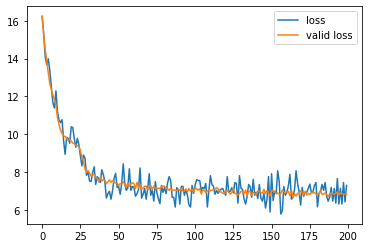

In [11]:
l1, = plt.plot(model.losses)
l2, = plt.plot(model.valid_losses)
plt.legend([l1, l2], ['loss', 'valid loss'])
plt.show()